In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install fredapi

In [ ]:
import statsmodels.api as statsmodels
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
from fredapi import Fred
fred = Fred(api_key='3cdedbd2886ec9e27a3baa16ea7bc107')
unemp = fred.get_series('UNRATE')
cpi = fred.get_series('CPALTT01USM657N')
gdp = fred.get_series('GDP')
indus = fred.get_series('INDPRO')
mort15 = fred.get_series('MORTGAGE15US')
AAA = fred.get_series('AAA')
pce = fred.get_series('PCE')
home_price = fred.get_series('CSUSHPINSA')
saving = fred.get_series('PSAVERT')

In [ ]:
AAA = AAA.reset_index().rename(columns={'index': 'Month', 0: 'Percentage'})
unemp = unemp.reset_index().rename(columns={'index': 'Month', 0: 'Percentage'})
cpi = cpi.reset_index().rename(columns={'index': 'Month', 0: 'Growth Rate previous period'})
gdp = gdp.reset_index().rename(columns={'index': 'Quater Date', 0: 'Bil of Dollars'})
mort15 = mort15.reset_index().rename(columns={'index': 'Weekly', 0: 'Percentage'})
indus = indus.reset_index().rename(columns={'index': 'Month', 0: 'industrial index'})
pce = pce.reset_index().rename(columns={'index': 'Month', 0: 'personal expenditure'})
home_price = home_price.reset_index().rename(columns={'index': 'Month', 0: 'home price'})
saving = saving.reset_index().rename(columns={'index': 'Month', 0: 'savings'})

In [ ]:
AAA.set_index('Month', inplace=True)
cpi.set_index('Month', inplace=True)
unemp.set_index('Month', inplace=True)
gdp.set_index('Quater Date', inplace=True)
mort15.set_index('Weekly', inplace=True)
indus.set_index('Month', inplace=True)
pce.set_index('Month', inplace=True)
saving.set_index('Month', inplace=True)
home_price.set_index('Month', inplace=True)

In [ ]:
saving

,savings
Month,
1959-01-01,11.3
1959-02-01,10.6
1959-03-01,10.3
1959-04-01,11.2
1959-05-01,10.6
...,...
2023-07-01,4.4
2023-08-01,4.4
2023-09-01,3.8


Data preprocessing

In [ ]:
# Specify the cutoff date
cutoff_date = '1991-11-30'

# Filter the DataFrame to include only values after the cutoff date
AAA = AAA[AAA.index > pd.to_datetime(cutoff_date)]

# Filter the DataFrame to include only values after the cutoff date
unemp = unemp[unemp.index > pd.to_datetime(cutoff_date)]

# Filter the DataFrame to include only values after the cutoff date
cpi = cpi[cpi.index > pd.to_datetime(cutoff_date)]

# Filter the DataFrame to include only values after the cutoff date
gdp = gdp[gdp.index > pd.to_datetime(cutoff_date)]

# Filter the DataFrame to include only values after the cutoff date
mort15 = mort15[mort15.index > pd.to_datetime(cutoff_date)]

indus = indus[indus.index > pd.to_datetime(cutoff_date)]

pce = pce[pce.index > pd.to_datetime(cutoff_date)]

saving = saving[saving.index > pd.to_datetime(cutoff_date)]

home_price = home_price[home_price.index > pd.to_datetime(cutoff_date)]

In [ ]:
home_price

,home price
Month,
1991-12-01,75.844
1992-01-01,75.700
1992-02-01,75.655
1992-03-01,75.814
1992-04-01,76.080
...,...
2023-06-01,308.285
2023-07-01,310.146
2023-08-01,311.519


Here specifying the time period across which i want to anaylse the data.

In [ ]:
data = mort15
# Define the desired date range with Month Start frequency
start_date = '1991-12-01'
end_date = '2023-12-01'
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Resample to monthly frequency
monthly_data = data.resample('MS').mean()

# Reindex to fill missing months
monthly_data = monthly_data.reindex(date_range)

# Interpolate missing values if needed
monthly_data.interpolate(method='linear', inplace=True)

a = monthly_data = monthly_data.rename_axis('Month')
a

,Percentage
Month,
1991-12-01,8.0700
1992-01-01,8.0060
1992-02-01,8.3825
1992-03-01,8.5775
1992-04-01,8.4700
...,...
2023-08-01,6.4300
2023-09-01,6.5725
2023-10-01,6.9050


In [ ]:
df = a
df = df.iloc[:-2]

mort15 = df
mort15

,Percentage
Month,
1991-12-01,8.0700
1992-01-01,8.0060
1992-02-01,8.3825
1992-03-01,8.5775
1992-04-01,8.4700
...,...
2023-06-01,6.0880
2023-07-01,6.1775
2023-08-01,6.4300


In [ ]:
AAA = AAA.iloc[:-1]
AAA

,Percentage
Month,
1991-12-01,8.31
1992-01-01,8.20
1992-02-01,8.29
1992-03-01,8.35
1992-04-01,8.33
...,...
2023-06-01,4.65
2023-07-01,4.66
2023-08-01,4.95


In [ ]:
unemp = unemp.iloc[:-1]
unemp

,Percentage
Month,
1991-12-01,7.3
1992-01-01,7.3
1992-02-01,7.4
1992-03-01,7.4
1992-04-01,7.4
...,...
2023-06-01,3.6
2023-07-01,3.5
2023-08-01,3.8


In [ ]:
cpi

,Growth Rate previous period
Month,
1991-12-01,0.072569
1992-01-01,0.145033
1992-02-01,0.362056
1992-03-01,0.505051
1992-04-01,0.143575
...,...
2023-06-01,0.322891
2023-07-01,0.190752
2023-08-01,0.436716


In [ ]:
indus = indus.iloc[:-1]
indus

,industrial index
Month,
1991-12-01,61.8108
1992-01-01,61.4898
1992-02-01,61.9299
1992-03-01,62.4490
1992-04-01,62.9312
...,...
2023-06-01,102.3002
2023-07-01,103.2166
2023-08-01,103.2158


In [ ]:
pce = pce.iloc[:-1]

In [ ]:
pce

,personal expenditure
Month,
1991-12-01,4020.5
1992-01-01,4084.7
1992-02-01,4099.5
1992-03-01,4117.0
1992-04-01,4131.5
...,...
2023-06-01,18485.4
2023-07-01,18595.4
2023-08-01,18651.6


In [ ]:
saving = saving.iloc[:-1]

In [ ]:
saving

,savings
Month,
1991-12-01,9.8
1992-01-01,9.5
1992-02-01,9.8
1992-03-01,9.7
1992-04-01,9.8
...,...
2023-06-01,4.8
2023-07-01,4.4
2023-08-01,4.4


In [ ]:
AAA

,Percentage
Month,
1991-12-01,8.31
1992-01-01,8.20
1992-02-01,8.29
1992-03-01,8.35
1992-04-01,8.33
...,...
2023-06-01,4.65
2023-07-01,4.66
2023-08-01,4.95


In [ ]:

merged_df = pd.merge(unemp, indus, on="Month")

merged_df = pd.merge(merged_df, pce, on="Month")
merged_df = pd.merge(merged_df, saving, on="Month")
merged_df = pd.merge(merged_df, home_price, on="Month")

In [ ]:
df = merged_df
df = df.rename(columns={
    'Percentage': 'unemp',


})
df

,unemp,industrial index,personal expenditure,savings,home price
Month,,,,,
1991-12-01,7.3,61.8108,4020.5,9.8,75.844
1992-01-01,7.3,61.4898,4084.7,9.5,75.700
1992-02-01,7.4,61.9299,4099.5,9.8,75.655
1992-03-01,7.4,62.4490,4117.0,9.7,75.814
1992-04-01,7.4,62.9312,4131.5,9.8,76.080
...,...,...,...,...,...
2023-06-01,3.6,102.3002,18485.4,4.8,308.285
2023-07-01,3.5,103.2166,18595.4,4.4,310.146
2023-08-01,3.8,103.2158,18651.6,4.4,311.519


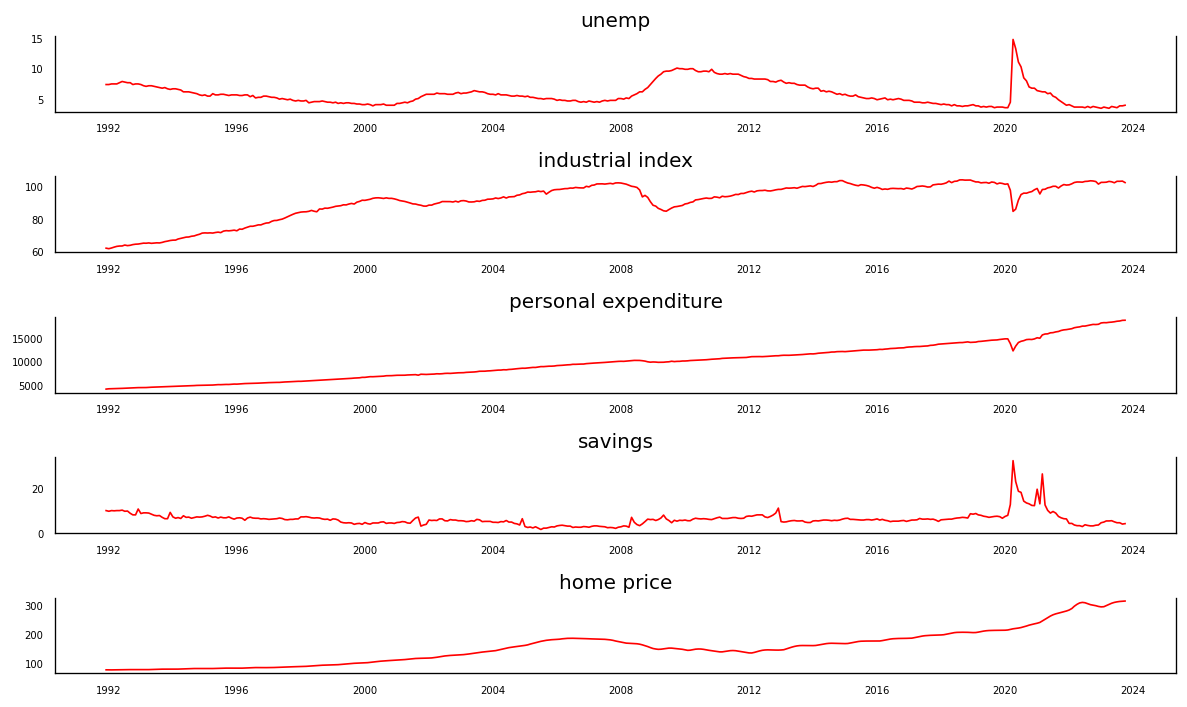

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
varivales = ["unemp",'indus','personal expenditure','savings','home price']

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import numpy as np

def grangers_causation_matrix(df, variables, test='ssr_chi2test', maxlag=12, verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values are
    zero, that is, the X does not cause Y can be rejected.

    df        : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df_result = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df_result.columns:
        for r in df_result.index:
            if df[c].std() > 0 and df[r].std() > 0:  # Check for constant columns
                test_result = grangercausalitytests(df[[r, c]], maxlag=maxlag, verbose=False)
                p_values = [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
                if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
                min_p_value = np.min(p_values)
                df_result.loc[r, c] = min_p_value
            else:
                df_result.loc[r, c] = np.nan  # Assign NaN for constant columns
    df_result.columns = [var + '_x' for var in variables]
    df_result.index = [var + '_y' for var in variables]
    return df_result

# Assuming df is your DataFrame
grangers_causation_matrix(df, variables=df.columns)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul

,unemp_x,industrial index_x,personal expenditure_x,savings_x,home price_x
unemp_y,1.0,0.0000,0.0000,0.0018,0.0285
industrial index_y,0.0,1.0000,0.0000,0.0000,0.0155
personal expenditure_y,0.0,0.0000,1.0000,0.0000,0.0006
savings_y,0.0,0.0000,0.0000,1.0000,0.0100
home price_y,0.0,0.0812,0.0028,0.0000,1.0000


In [ ]:
df = merged_df

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Percentage ::  139.52    > 60.0627   =>   True
industrial index ::  39.41     > 40.1749   =>   False
personal expenditure ::  23.35     > 24.2761   =>   False
savings ::  8.75      > 12.3212   =>   False
home price ::  2.39      > 4.1296    =>   False


In [ ]:
nobs = 8
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  #
print(df_test.shape)  #

(375, 5)
(8, 5)


In [ ]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Percentage" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.1579
 No. Lags Chosen       = 0
 Critical value 1%     = -3.448
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0226. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "industrial index" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5065
 No. Lags Chosen       = 2
 Critical value 1%     = -3.448
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.1139. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "personal expenditure" 
    -----------------------------------------------
 Null Hypothesis: Data

<ipython-input-29-43ef529c10d8>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_train.iteritems():


In [ ]:
df_differenced = df_train.diff().dropna()

In [ ]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Percentage" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.4552
 No. Lags Chosen       = 3
 Critical value 1%     = -3.448
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "industrial index" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -14.2048
 No. Lags Chosen       = 1
 Critical value 1%     = -3.448
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "personal expenditure" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Statio

<ipython-input-31-6f3c31aca052>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_differenced.iteritems():


In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Lag Order = 1
AIC :  5.2519079675322144
BIC :  5.567316419514291
FPE :  190.9328592170485
HQIC:  5.377152424094836 

Lag Order = 2
AIC :  4.607806645851576
BIC :  5.187212995273681
FPE :  100.27263992560238
HQIC:  4.837904640675996 

Lag Order = 3
AIC :  4.379220600543403
BIC :  5.223684657170343
FPE :  79.79718849589149
HQIC:  4.714614541045986 

Lag Order = 4
AIC :  4.348512142244969
BIC :  5.459100833034207
FPE :  77.410525799571
HQIC:  4.789647439555749 

Lag Order = 5
AIC :  4.29375567098788
BIC :  5.6715431065577135
FPE :  73.32673039728114
HQIC:  4.8410807678787915 

Lag Order = 6
AIC :  4.304417170967472
BIC :  5.950484712859277
FPE :  74.17434230285355
HQIC:  4.958383570109445 

Lag Order = 7
AIC :  4.286681007930262
BIC :  6.202117336676373
FPE :  72.95519679963651
HQIC:  5.047743300483855 

Lag Order = 8
AIC :  4.233517498217384
BIC :  6.419418682226346
FPE :  69.28572763461509
HQIC:  5.102133392761699 

Lag Order = 9
AIC :  4.089432824822486
BIC :  6.546902390093646
FPE :  

In [ ]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,8.320,8.374,4105.,8.341
1,5.367,5.689,214.1,5.495
2,4.712,5.303*,111.3,4.947
3,4.471,5.331,87.49,4.813
4,4.429,5.558,83.94,4.878
5,4.365,5.762,78.74,4.920
6,4.364,6.030,78.75,5.027
7,4.329,6.264,76.14,5.098
8,4.272,6.476,71.99,5.148
9,4.117,6.590,61.81,5.100


In [ ]:
model_fitted = model.fit(4)
model_fitted.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, Jan, 2024
Time:                     11:20:07
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    5.45910
Nobs:                     370.000    HQIC:                   4.78965
Log likelihood:          -3324.51    FPE:                    77.4105
AIC:                      4.34851    Det(Omega_mle):         58.7388
--------------------------------------------------------------------
Results for equation Percentage
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.119279         0.032677            3.650           0.000
L1.Percentage                  -1.091522         0.085301          -12.796           0.000
L1.industrial i

In [ ]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(str(col), ':', round(val, 2))

Percentage : 2.0
industrial index : 2.07
personal expenditure : 1.99
savings : 1.96
home price : 1.96


In [ ]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[-1.0000e-01, -3.4070e-01, -2.2600e+01,  3.0000e-01, -1.8030e+00],
       [-1.0000e-01, -1.5859e+00,  5.1100e+01,  1.0000e-01, -2.5120e+00],
       [-1.0000e-01,  1.0630e+00,  2.8600e+02,  1.0000e+00, -1.5720e+00],
       [ 2.0000e-01,  1.9300e-02,  6.6900e+01,  3.0000e-01,  6.1500e-01]])

In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,Percentage_1d,industrial index_1d,personal expenditure_1d,savings_1d,home price_1d
Month,,,,,
2023-03-01,0.035540,-0.348601,37.736932,-1.424266,2.175676
2023-04-01,0.143064,-0.228211,84.688704,-0.161217,3.095809
2023-05-01,-0.103193,0.254096,72.038991,-1.052931,2.985854
2023-06-01,-0.222369,0.397586,55.050277,-0.232943,2.302362
2023-07-01,-0.033945,0.119255,49.982443,0.038828,1.505554
2023-08-01,-0.116991,0.142128,66.276043,-0.072332,0.863484
2023-09-01,-0.097626,0.244563,67.896454,-0.045154,0.557945
2023-10-01,-0.005752,0.105867,45.822218,-0.002945,0.511685


In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=True):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        # Roll back 1st Diff

        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(df_train, df_forecast, second_diff=True)
df_results.loc[:, ['Percentage_forecast','industrial index_forecast', 'personal expenditure_forecast', 'savings_forecast',
                   'home price_forecast']]


,Percentage_forecast,industrial index_forecast,personal expenditure_forecast,savings_forecast,home price_forecast
Month,,,,,
2023-03-01,3.635540,102.218499,18334.236932,3.275734,295.610676
2023-04-01,3.778604,101.990288,18418.925636,3.114517,298.706485
2023-05-01,3.675411,102.244384,18490.964627,2.061586,301.692340
2023-06-01,3.453042,102.641971,18546.014904,1.828643,303.994702
2023-07-01,3.419097,102.761226,18595.997348,1.867471,305.500256
2023-08-01,3.302107,102.903354,18662.273391,1.795138,306.363741
2023-09-01,3.204481,103.147916,18730.169845,1.749984,306.921685
2023-10-01,3.198729,103.253783,18775.992064,1.747039,307.433370


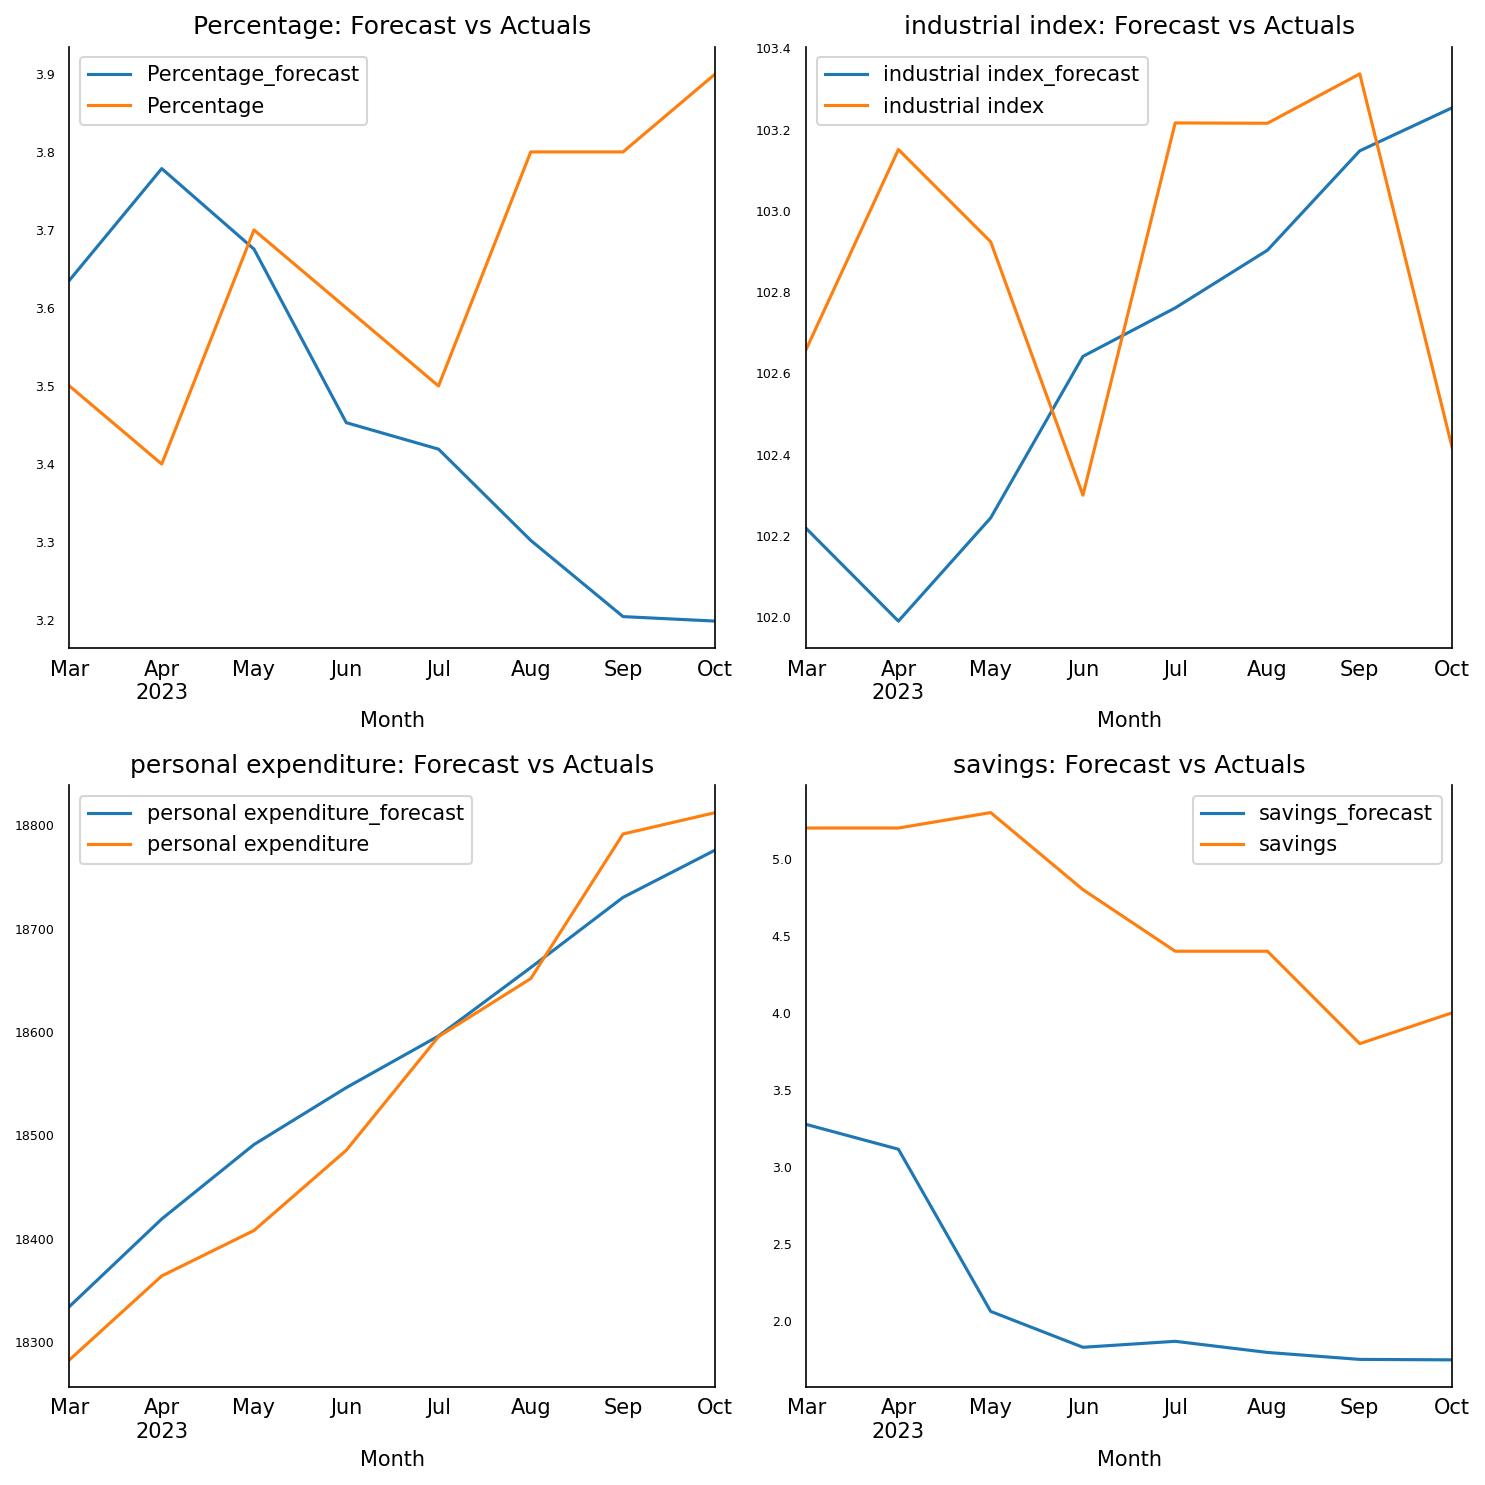

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();